In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function, absolute_import, division

In [3]:
import numpy as np
from GomokuBoard import GomokuBoard
from HeuristicPolicy import Move, StochasticMaxSampler, HeuristicGomokuPolicy
from Heuristics import Heuristics

In [4]:
A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U = \
    1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
BLACK=0
WHITE=1
EDGES=2

## A sampler
This class allows to sample from the top n of an array of scores, 
with higher probability for the larger scores. With bias > 1.0,
the sampler has an even higher bias toward the larger scores.


In [5]:
sample = np.random.randint(0, 100, [8,8])/20.0
enumerated = list(np.ndenumerate(sample))
sampler = StochasticMaxSampler(enumerated, 10, bias=5)
sampler.choices

[(0.7736363644478348, (3, 3), 0.22636363555216515, 4.9),
 (0.5973441878209191, (5, 6), 0.1762921766269157, 4.85),
 (0.4210520111940034, (1, 1), 0.1762921766269157, 4.85),
 (0.3141254010023039, (0, 1), 0.10692661019169948, 4.75),
 (0.2308508732538374, (4, 3), 0.08327452774846648, 4.7),
 (0.16599660583343023, (7, 1), 0.06485426742040719, 4.65),
 (0.11548805158089498, (7, 0), 0.05050855425253524, 4.6),
 (0.06497949732835974, (4, 1), 0.05050855425253524, 4.6),
 (0.0144709430758245, (0, 6), 0.05050855425253524, 4.6),
 (0.0, (3, 4), 0.0144709430758245, 4.35)]

In [6]:
print([sampler.draw() for i in range(10)])

[(4, 3), (5, 6), (0, 6), (3, 3), (5, 6), (0, 6), (3, 3), (3, 3), (5, 6), (0, 1)]


## Use a policy to play a bit

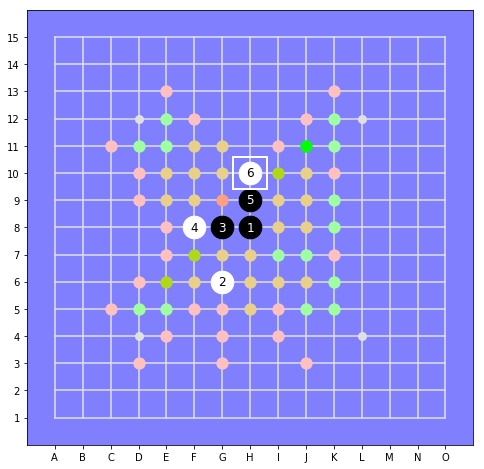

In [8]:
h = Heuristics(kappa=3.0)
board = GomokuBoard(h, N=15, disp_width=8)
p = HeuristicGomokuPolicy(board, 2)
board.set(H,8).set('G',6).set(G,8).set(F,8).set(H,9).set(H,10)
board.display('current');

Here: (7, 8)
Style: 2: (I, 8)
Value after the move: 18.396725294432827


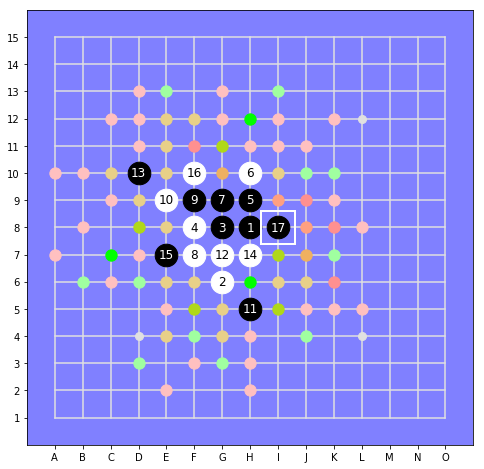

In [19]:
move = p.suggest(bias=.2, topn=5)
print(move)
if move.status == 0:
    board.set(move.x, move.y) 
    print("Value after the move: %s" % board.get_value())
else:
    print("GAME OVER!")
board.display('current')